# Прохоренко Олександр ФІ-21мн
## Lab 3: Neural Nets

## 1. Повнозв'язані нейронні мережі
### Breast Cancer Wisconsin (Diagnostic) Data Set
### https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [1]:
import numpy as np
import pandas as pd
import gc, sys
gc.enable()

data = pd.read_csv("data.csv")
data.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
data['diagnosis'].replace(to_replace=['M', 'B'], value=[1, 0], inplace=True)
data_np = data.to_numpy()

In [2]:
import random

index_split=int(0.3*len(data_np))
np.random.shuffle(data_np)
x_train = data_np[index_split:,1:]
y_train = data_np[index_split:,0]
x_test = data_np[:index_split,1:]
y_test = data_np[:index_split,0]

del data, data_np
gc.collect()

192

In [3]:
m = x_train.mean(axis=0)
x_train -= m
s = x_train.std(axis=0)
x_train /= s
x_test -= m
x_test /= s

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

fcnn_model = Sequential()
fcnn_model.add(Dense(12, input_dim = len(x_train[0,:]), activation='relu'))
fcnn_model.add(Dense(8, activation='relu'))
fcnn_model.add(Dense(4, activation='relu'))
fcnn_model.add(Dense(1, activation='sigmoid'))
fcnn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [5]:
from tensorflow.keras.callbacks import EarlyStopping
callback_es= EarlyStopping(monitor='val_loss', mode='min', patience=20, verbose=1)
fcnn_model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=200, callbacks=[callback_es])

Epoch 1/200
13/13 [==============================] - 1s 12ms/step - loss: 0.6478 - accuracy: 0.6241 - val_loss: 0.6075 - val_accuracy: 0.6118
Epoch 2/200
13/13 [==============================] - 0s 3ms/step - loss: 0.5336 - accuracy: 0.6466 - val_loss: 0.4774 - val_accuracy: 0.7118
Epoch 3/200
13/13 [==============================] - 0s 3ms/step - loss: 0.4243 - accuracy: 0.7744 - val_loss: 0.3654 - val_accuracy: 0.8412
Epoch 4/200
13/13 [==============================] - 0s 3ms/step - loss: 0.3297 - accuracy: 0.8747 - val_loss: 0.2989 - val_accuracy: 0.9294
Epoch 5/200
13/13 [==============================] - 0s 3ms/step - loss: 0.2699 - accuracy: 0.9223 - val_loss: 0.2603 - val_accuracy: 0.9294
Epoch 6/200
13/13 [==============================] - 0s 3ms/step - loss: 0.2315 - accuracy: 0.9323 - val_loss: 0.2314 - val_accuracy: 0.9294
Epoch 7/200
13/13 [==============================] - 0s 3ms/step - loss: 0.2018 - accuracy: 0.9499 - val_loss: 0.2035 - val_accuracy: 0.9353
Epoch 8/200


Epoch 59/200
13/13 [==============================] - 0s 3ms/step - loss: 0.0258 - accuracy: 0.9950 - val_loss: 0.0927 - val_accuracy: 0.9765
Epoch 60/200
13/13 [==============================] - 0s 3ms/step - loss: 0.0250 - accuracy: 0.9950 - val_loss: 0.0923 - val_accuracy: 0.9824
Epoch 61/200
13/13 [==============================] - 0s 3ms/step - loss: 0.0243 - accuracy: 0.9950 - val_loss: 0.0934 - val_accuracy: 0.9824
Epoch 62/200
13/13 [==============================] - 0s 3ms/step - loss: 0.0237 - accuracy: 0.9950 - val_loss: 0.0928 - val_accuracy: 0.9824
Epoch 63/200
13/13 [==============================] - 0s 3ms/step - loss: 0.0231 - accuracy: 0.9950 - val_loss: 0.0943 - val_accuracy: 0.9824
Epoch 64/200
13/13 [==============================] - 0s 3ms/step - loss: 0.0224 - accuracy: 0.9950 - val_loss: 0.0945 - val_accuracy: 0.9824
Epoch 65/200
13/13 [==============================] - 0s 3ms/step - loss: 0.0217 - accuracy: 0.9950 - val_loss: 0.0964 - val_accuracy: 0.9824
Epoch 

In [8]:
predictions = fcnn_model.predict(x_test)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]

6/6 [==============================] - 0s 989us/step


In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f'Accuracy: {accuracy_score(y_test, prediction_classes):.2f}')
print(f'Precision: {precision_score(y_test, prediction_classes):.2f}')
print(f'Recall: {recall_score(y_test, prediction_classes):.2f}')

Accuracy: 0.98
Precision: 0.98
Recall: 0.97


In [10]:
del fcnn_model, x_train, y_train, x_test, y_test
gc.collect()

2370

## 2. Згорткові нейронні мережі

In [11]:
import os
from tqdm import tqdm
import cv2
from matplotlib import pyplot as plt

In [12]:
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

In [13]:
def load_data():
    datasets = ['./img/seg_train', './img/seg_test']
    output = []
    
    for dataset in datasets:
        images = []
        labels = []
        print("Loading {}".format(dataset))        
        for folder in os.listdir(dataset):
            label = class_names_label[folder]            
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                img_path = os.path.join(os.path.join(dataset, folder), file)
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE)
                images.append(image)
                labels.append(label)             
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        output.append((images, labels))
    del images, labels
    gc.collect()
    return output

In [14]:
(train_images, train_labels), (test_images, test_labels) = load_data()

Loading ./img/seg_train


100%|██████████| 2382/2382 [00:00<00:00, 2765.22it/s]


Loading ./img/seg_test


100%|██████████| 501/501 [00:00<00:00, 2876.24it/s]


In [15]:
from sklearn.utils import shuffle 
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [16]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

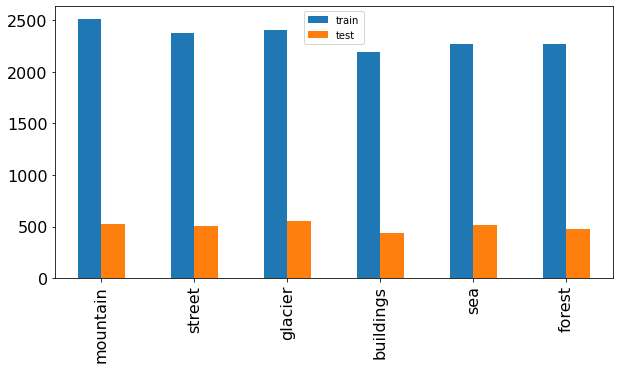

In [17]:
_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar(figsize=(10,5), fontsize=16)
plt.show()

In [18]:
import matplotlib.pyplot as plt

def display25(class_names, images, labels, text):
    fig = plt.figure(figsize=(20,20))
    fig.suptitle(text, fontsize=32)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]], fontsize=24)
    plt.show()
    
def display_random_image(class_names, images, labels):
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]], fontsize=24)
    plt.show()

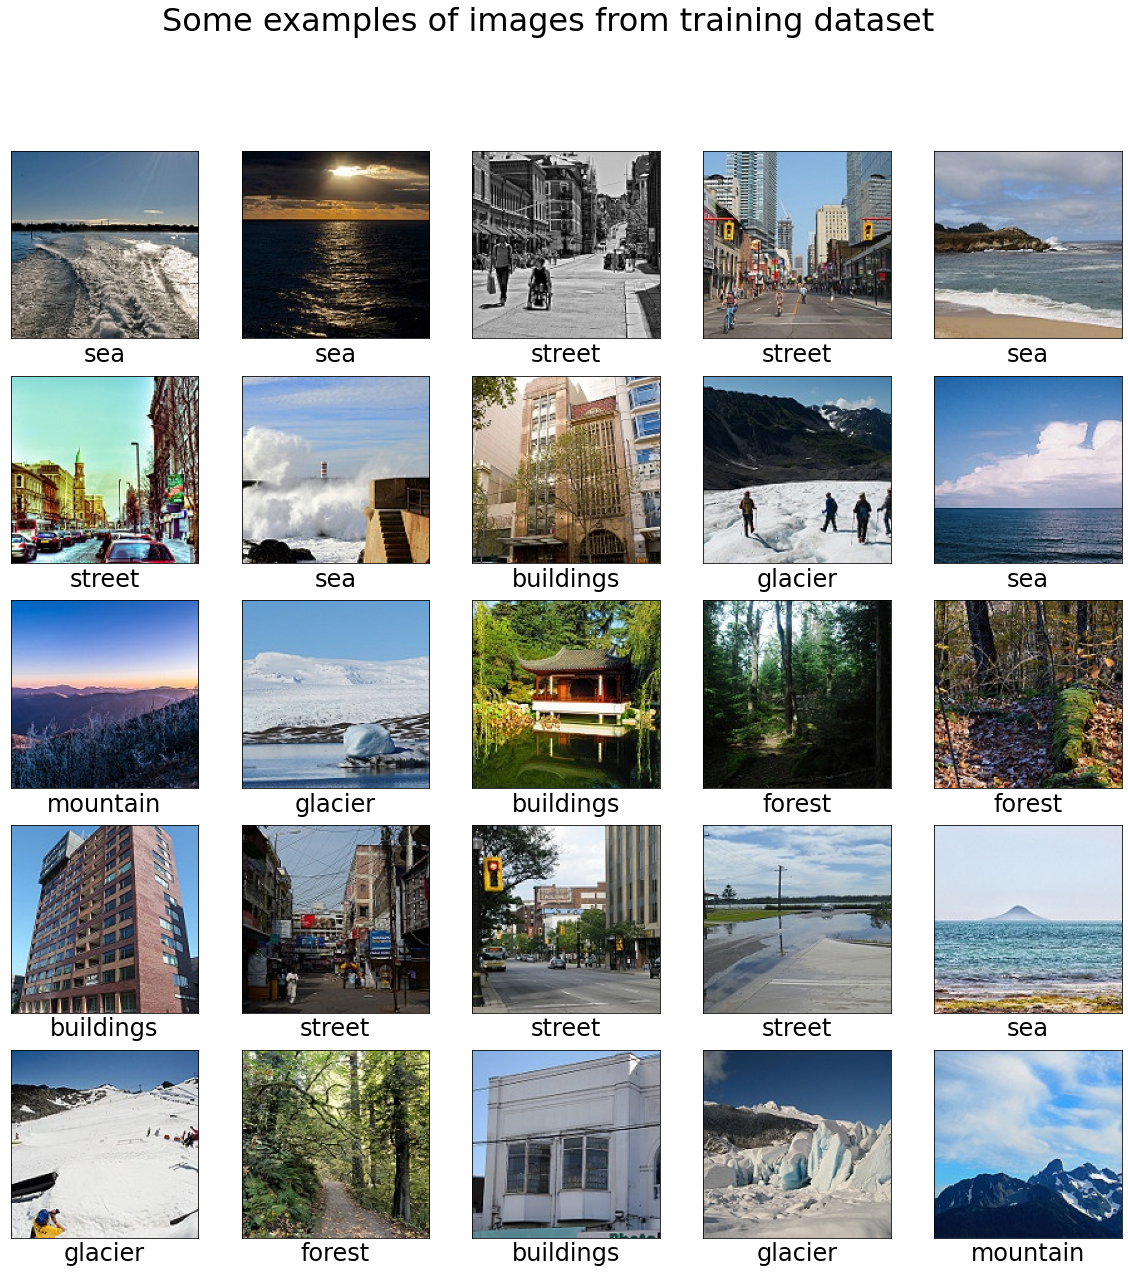

In [19]:
display25(class_names, train_images, train_labels, "Some examples of images from training dataset")

In [20]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation = 'relu', input_shape = (150, 150, 3)))
cnn_model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding='same'))
cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2), strides =2, padding='same'))
cnn_model.add(Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (2,2), strides =2, padding='same'))
cnn_model.add(Flatten())
cnn_model.add(Dense(100, activation='relu'))
cnn_model.add(Dense(6, activation='softmax'))
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [21]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 128)     

In [22]:
callback= EarlyStopping(monitor='val_loss', mode='min', patience=5, verbose=1)
cnn_model.fit(train_images, train_labels, batch_size=256, epochs=20, validation_split = 0.2, callbacks=[callback], verbose=1)

Epoch 1/20
44/44 [==============================] - 98s 2s/step - loss: 1.3926 - accuracy: 0.4643 - val_loss: 1.0231 - val_accuracy: 0.6128
Epoch 2/20
44/44 [==============================] - 104s 2s/step - loss: 0.9159 - accuracy: 0.6579 - val_loss: 0.8658 - val_accuracy: 0.6747
Epoch 3/20
44/44 [==============================] - 101s 2s/step - loss: 0.7617 - accuracy: 0.7196 - val_loss: 0.7341 - val_accuracy: 0.7285
Epoch 4/20
44/44 [==============================] - 100s 2s/step - loss: 0.6266 - accuracy: 0.7722 - val_loss: 0.6603 - val_accuracy: 0.7524
Epoch 5/20
44/44 [==============================] - 100s 2s/step - loss: 0.5249 - accuracy: 0.8144 - val_loss: 0.6892 - val_accuracy: 0.7446
Epoch 6/20
44/44 [==============================] - 97s 2s/step - loss: 0.4651 - accuracy: 0.8384 - val_loss: 0.6151 - val_accuracy: 0.7820
Epoch 7/20
44/44 [==============================] - 98s 2s/step - loss: 0.3633 - accuracy: 0.8741 - val_loss: 0.6012 - val_accuracy: 0.7756
Epoch 8/20
44/44

In [23]:
predictions = cnn_model.predict(test_images)

94/94 [==============================] - 9s 88ms/step


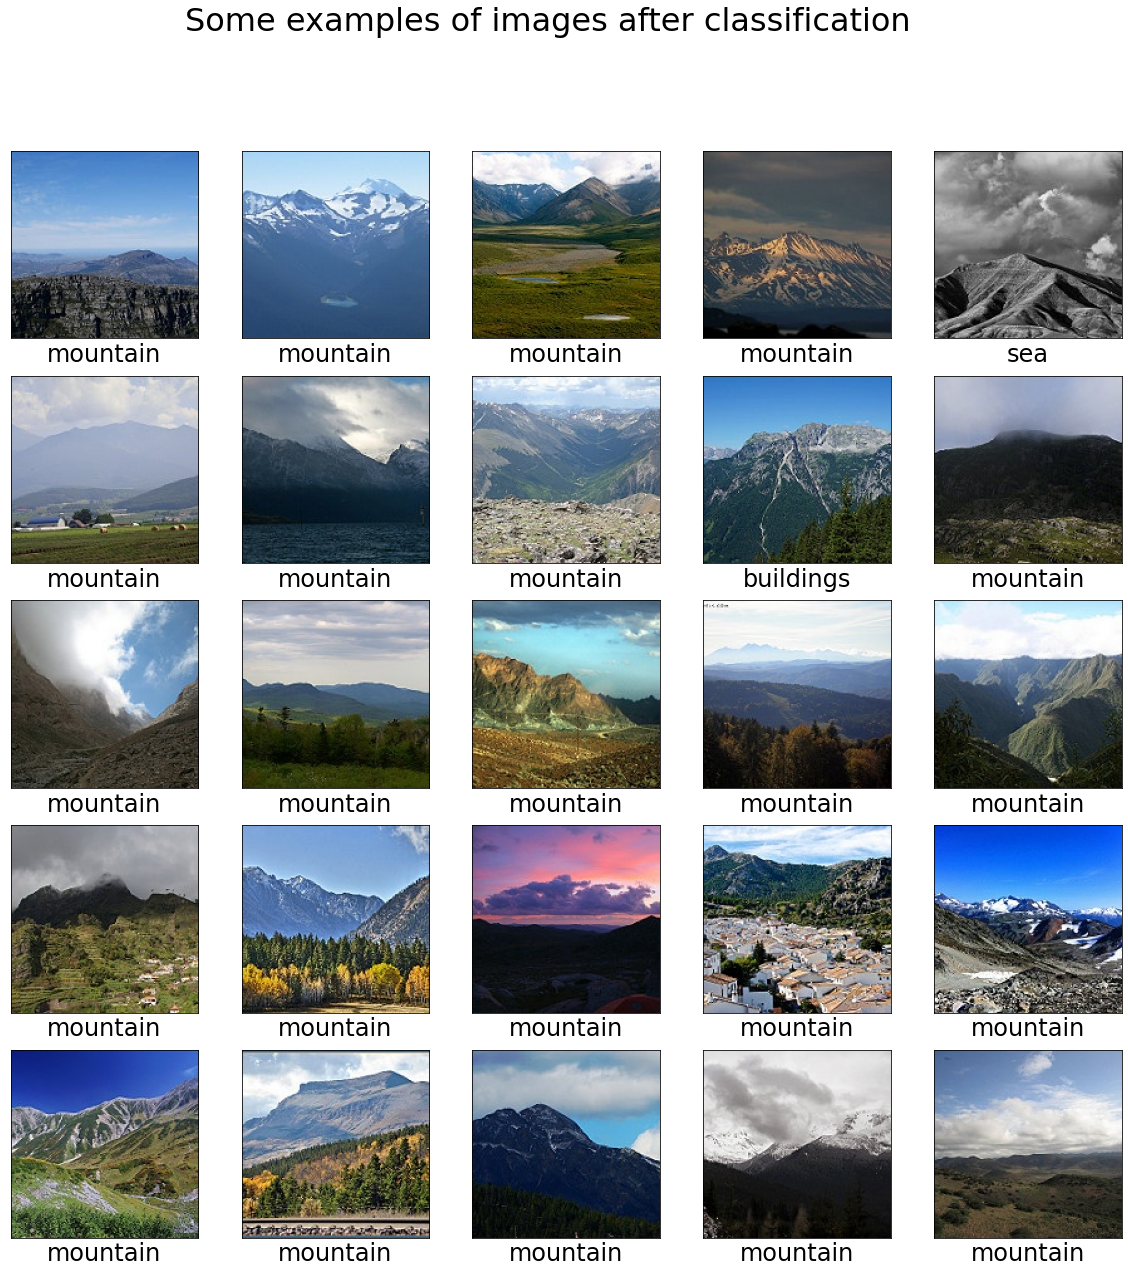

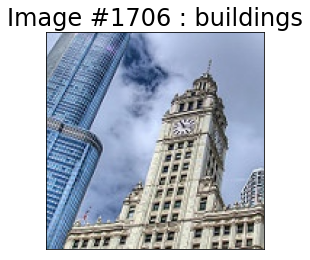

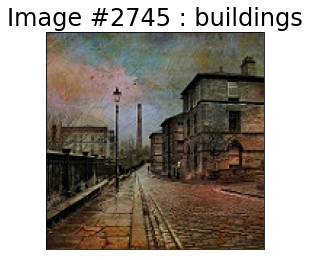

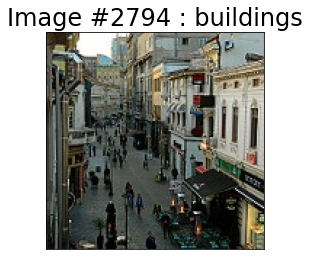

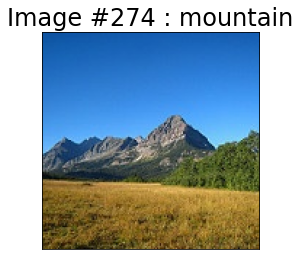

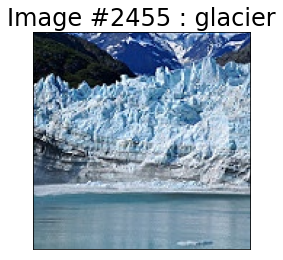

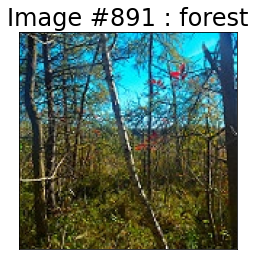

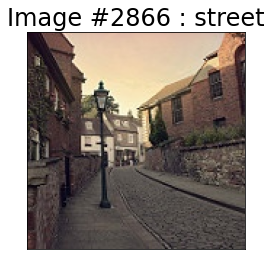

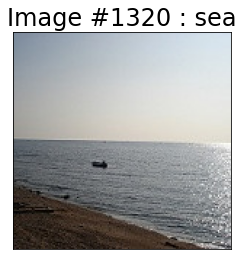

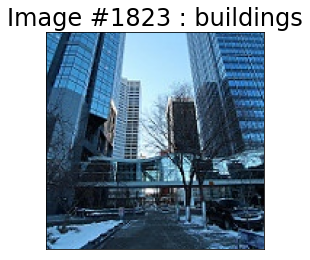

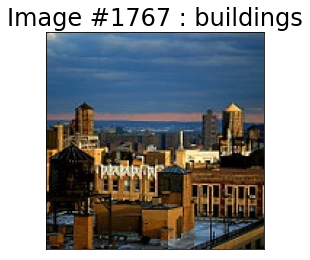

In [24]:
pred_labels = np.argmax(predictions, axis = 1)
display25(class_names, test_images, pred_labels, "Some examples of images after classification")
for i in range(10):
    display_random_image(class_names, test_images, pred_labels)

In [25]:
print(f'Accuracy: {accuracy_score(test_labels, pred_labels):.2f}')

Accuracy: 0.79


In [26]:
del cnn_model, train_images, train_labels, test_images, test_labels, predictions, pred_labels
gc.collect()

62858

## 3. Рекурентні нейронні мережі
### Physics vs Chemistry vs Biology
### https://www.kaggle.com/datasets/vivmankar/physics-vs-chemistry-vs-biology

In [138]:
train = pd.read_csv("train.csv")
train.drop(['Id'], axis=1, inplace=True)
test = pd.read_csv("test.csv")
test.drop(['Id'], axis=1, inplace=True)

In [139]:
train['Comment'] = train['Comment'].apply(lambda x: x.lower())
test['Comment'] = test['Comment'].apply(lambda x: x.lower())

In [140]:
import string

train['Comment'] = train['Comment'].apply(lambda x:"".join([i for i in x if i not in string.punctuation]))
test['Comment'] = test['Comment'].apply(lambda x:"".join([i for i in x if i not in string.punctuation]))

In [141]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
train['Comment'] = train['Comment'].apply(lambda x:" ".join(i for i in x.split() if i not in stop_words))
test['Comment'] = test['Comment'].apply(lambda x:" ".join(i for i in x.split() if i not in stop_words))

In [142]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
train['Comment'] = train['Comment'].apply(lambda x:" ".join(porter_stemmer.stem(i) for i in x.split()))
test['Comment'] = test['Comment'].apply(lambda x:" ".join(porter_stemmer.stem(i) for i in x.split()))

In [143]:
train['Topic'].replace(to_replace=['Biology', 'Physics', 'Chemistry'], value=[1, 2, 3], inplace=True)
test['Topic'].replace(to_replace=['Biology', 'Physics', 'Chemistry'], value=[1, 2, 3], inplace=True)

In [162]:
x_train=train['Comment'].values
y_train=pd.get_dummies(train['Topic']).values
x_test=test['Comment'].values
y_test=pd.get_dummies(test['Topic']).values

In [145]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import pad_sequences

max_words = 50000
max_len = 100
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(x_train)
x_train = tok.texts_to_sequences(x_train)
x_train = pad_sequences(x_train,maxlen=max_len)

In [146]:
from keras.layers import LSTM, Embedding

rnn_model = Sequential()
rnn_model.add(Embedding(max_words, 128, input_length=max_len))
rnn_model.add(LSTM(128,return_sequences = True))
rnn_model.add(LSTM(128))
rnn_model.add(Dense(3, activation='softmax'))

In [147]:
rnn_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 100, 128)          6400000   
                                                                 
 lstm_10 (LSTM)              (None, 100, 128)          131584    
                                                                 
 lstm_11 (LSTM)              (None, 128)               131584    
                                                                 
 dense_11 (Dense)            (None, 3)                 387       
                                                                 
Total params: 6,663,555
Trainable params: 6,663,555
Non-trainable params: 0
_________________________________________________________________


In [148]:
rnn_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', patience=7)

In [149]:
rnn_model.fit(x_train, y_train, validation_split = 0.2, epochs=100, callbacks=[es])

Epoch 1/100
218/218 [==============================] - 31s 131ms/step - loss: 0.9372 - accuracy: 0.5289 - val_loss: 0.7200 - val_accuracy: 0.6981
Epoch 2/100
218/218 [==============================] - 28s 128ms/step - loss: 0.5121 - accuracy: 0.7904 - val_loss: 0.7629 - val_accuracy: 0.6860
Epoch 3/100
218/218 [==============================] - 29s 132ms/step - loss: 0.2824 - accuracy: 0.8942 - val_loss: 0.8684 - val_accuracy: 0.7021
Epoch 4/100
218/218 [==============================] - 29s 132ms/step - loss: 0.1802 - accuracy: 0.9298 - val_loss: 0.9694 - val_accuracy: 0.6912
Epoch 5/100
218/218 [==============================] - 29s 132ms/step - loss: 0.1370 - accuracy: 0.9452 - val_loss: 1.1256 - val_accuracy: 0.6970
Epoch 6/100
218/218 [==============================] - 29s 132ms/step - loss: 0.1073 - accuracy: 0.9550 - val_loss: 1.3151 - val_accuracy: 0.6975
Epoch 7/100
218/218 [==============================] - 29s 132ms/step - loss: 0.0972 - accuracy: 0.9618 - val_loss: 1.4263 -

In [163]:
x_test = tok.texts_to_sequences(x_test)
x_test = pad_sequences(x_test,maxlen=max_len)
accr = rnn_model.evaluate(x_test,y_test)
print('Accuracy: {:0.3f}'.format(accr[1]))

50/50 [==============================] - 1s 24ms/step - loss: 1.3969 - accuracy: 0.7724
Accuracy: 0.772
